In [7]:
import matplotlib.pyplot as plt

import nn_tutorial.data as nd
import nn_tutorial.main as nm

# Load the Data

In [3]:
X, y = nd.load_data()

In [5]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [10]:
def plot_idx(i):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(X[i, :].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {y[i]}")

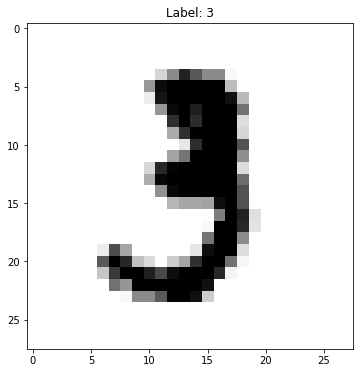

In [11]:
plot_idx(10)

# Calculate Batch Generators

In [12]:
X_tr, X_val, X_te, y_tr, y_val, y_te = nd.split_data(X, y)

In [14]:
num_epochs_tr = 1_000_000_000
batch_size = 128
bg_tr = nd.generate_batches(X_tr, y_tr, batch_size, num_epochs_tr)
bg_val = nd.generate_batches(X_val, y_val, batch_size, num_epochs_tr)
bg_te = nd.generate_batches(X_te, y_te, batch_size, 1)


# Train the Model

In [21]:
hidden_size = 256
max_steps = 5_000
learning_rate = 1e-3
batch_generators = (bg_tr, bg_val, bg_te)
logging_interval = 1_000

clf = nm.train_ff_model(
    hidden_size=hidden_size,
    max_steps=max_steps,
    learning_rate=learning_rate,
    batch_generators=batch_generators,
    logging_interval=logging_interval
)

[step 1]: loss_tr: -0.10087    loss_val: -0.12492    acc_val: 0.43750
[step 1000]: loss_tr: -0.92664    loss_val: -0.92132    acc_val: 0.93354
[step 2000]: loss_tr: -0.97310    loss_val: -0.95950    acc_val: 0.96247
[step 3000]: loss_tr: -0.98120    loss_val: -0.96439    acc_val: 0.96659
[step 4000]: loss_tr: -0.98513    loss_val: -0.96729    acc_val: 0.96850
[step 5000]: loss_tr: -0.98720    loss_val: -0.96864    acc_val: 0.97021
